In [27]:
import requests
import zipfile
import scanpy as sc
import anndata as ad

Download example data and decompress it. They are Cell Painting images of U2OS cells treated with cytochalasin D or mock.

In [ ]:

url = "https://zenodo.org/records/18510113/files/zenodo.zip"
output_path = 'zenodo.zip'

response = requests.get(url)
# Raise an exception if the download was unsuccessful
response.raise_for_status() 

# Write the content to a local file in binary mode ('wb')
with open(output_path, 'wb') as f:
    f.write(response.content)


with zipfile.ZipFile("zenodo.zip", 'r') as z:
    z.extractall("zenodo")


Extract image patches and metadata

In [30]:
import os
os.system("python -m ifcoder.extract --cp-csv zenodo/Cells.csv --out patches.h5ad")
os.system("python -m ifcoder.train --data patches.h5ad --out embeddings.h5ad")

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/work/src/ifcoder/extract.py", line 217, in <module>
    extract(
  File "/work/src/ifcoder/extract.py", line 117, in extract
    stack = _load_stack(paths)
            ^^^^^^^^^^^^^^^^^^
  File "/work/src/ifcoder/extract.py", line 39, in _load_stack
    raise FileNotFoundError(f"Image not found: {p}")
FileNotFoundError: Image not found: /data/example_data/cp_in/IXMtest_A01_s1_w29D113F4F-C9C2-44BE-BF6B-DF5496427220.tif
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/work/src/ifcoder/train.py", line 189, in <module>
    main()
  File "/work/src/ifcoder/train.py", line 79, in main
    ds = AnnDataPatches(args.data, normalize=args.normalize)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/work/src/ifcoder/train.py", line 1

256

In [17]:
adata = ad.read_h5ad("../embeddings.h5ad")

In [18]:
adata.obsm['X_ifcoder']

array([[-0.00183467, -0.00524912, -0.00807383, ..., -0.00891273,
        -0.00486291,  0.00065186],
       [-0.0014488 , -0.00537365, -0.00801337, ..., -0.00876023,
        -0.00490852,  0.00053091],
       [-0.0015729 , -0.00531647, -0.00807674, ..., -0.00887544,
        -0.00506764,  0.0006873 ],
       ...,
       [-0.00179254, -0.00515521, -0.00804784, ..., -0.00865712,
        -0.00482167,  0.00113725],
       [-0.0019202 , -0.00516605, -0.00790555, ..., -0.00863195,
        -0.0046035 ,  0.00117613],
       [-0.0017869 , -0.00511527, -0.0078121 , ..., -0.00861269,
        -0.00468172,  0.00121028]], shape=(536, 16), dtype=float32)

In [19]:
sc.pp.neighbors(adata, use_rep = 'X_ifcoder')

/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
sc.tl.umap(adata)

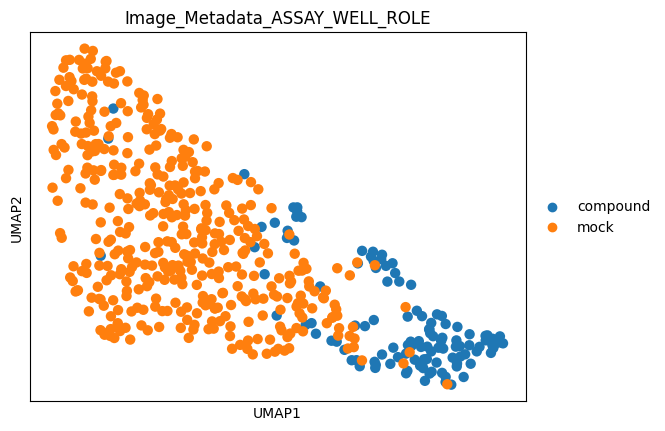

In [21]:
sc.pl.umap(adata, color='Image_Metadata_ASSAY_WELL_ROLE')